In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import seaborn as sns

# avogadro number
from scipy.constants import N_A

# This script assumes to be run in the same directory of `Scaling_data` (found in the same repo)

## A

In [2]:
droplets_a = pd.read_csv('Scaling_data/Results_A_droplets.csv')
organelles_a = pd.read_csv('Scaling_data/Results_A_organelles.csv')

In [3]:
droplets_area_a = np.array(droplets_a['Area'])
# Coordinates of droplet centre
droplets_x_a = np.array(droplets_a['X'])
droplets_y_a = np.array(droplets_a['Y'])

organelles_area_a = np.array(organelles_a['Area'])
# Coordinates of organelle centre
organelles_x_a = np.array(organelles_a['X'])
organelles_y_a = np.array(organelles_a['Y'])

droplets_area_sorted_a = []
organelles_area_sorted_a = []

def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

# For each droplet, find enclosed organelle as the one minimising inter-centre distance 
num_samples_a = len(droplets_area_a)
for i in range(num_samples_a): 
    droplets_area_sorted_a.append(droplets_area_a[i])
    dist = []
    for j in range(num_samples_a): 
        dist.append(distance(droplets_x_a[i], droplets_y_a[i], organelles_x_a[j], organelles_y_a[j]))
    closest_organelle_a = organelles_area_a[np.argmin(dist)]
    organelles_area_sorted_a.append(closest_organelle_a)

In [4]:
# Now extract radius assuming circular cross-section
organelles_radii_a = np.sqrt(np.array(organelles_area_sorted_a)/np.pi)
droplets_radii_a = np.sqrt(np.array(droplets_area_sorted_a)/np.pi)

# and compute volume assuming perfectly spherical shape
organelles_volumes_a = 4/3 * np.pi * organelles_radii_a**3
droplets_volumes_a = 4/3 * np.pi * droplets_radii_a**3

## B

In [5]:
# Results for B are already paired (they appear alternating in the CSV), so no need for sorting
b = pd.read_csv('Scaling_data/Results_B_combined_alternating.csv')

In [6]:
droplets_b = b[::2].reset_index().drop(columns = ['index'])
organelles_b = b[1::2].reset_index().drop(columns = ['index'])

droplets_b_area = np.array(droplets_b['Area'])
organelles_b_area = np.array(organelles_b['Area'])

In [7]:
# Once again, extract radii assuming perfectly circular cross-section
organelles_radii_b = np.sqrt(np.array(organelles_b_area)/np.pi)
droplets_radii_b = np.sqrt(np.array(droplets_b_area)/np.pi)

# and compute volumes assuming perfectly spherical 3D shape
organelles_volumes_b = 4/3 * np.pi * organelles_radii_b**3
droplets_volumes_b = 4/3 * np.pi * droplets_radii_b**3

## Let's fit a linear regression

In [8]:
print(f"Number of A droplet/organelle pairs: {len(droplets_a)}")
print(f"Number of B droplet/organelle pairs: {len(droplets_b)}")

Number of A droplet/organelle pairs: 66
Number of B droplet/organelle pairs: 70


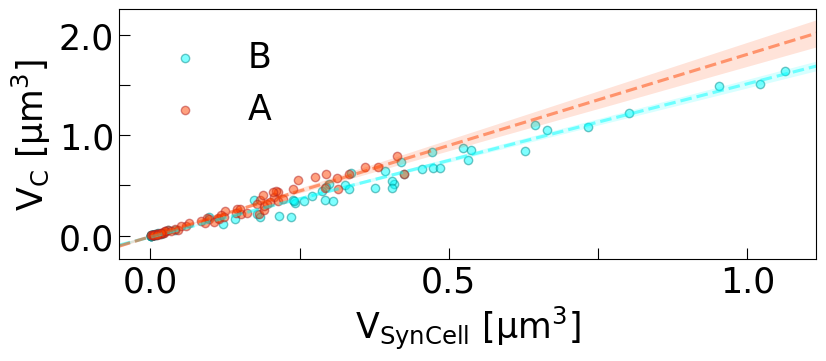

In [9]:
# Figure 3d (missing axis scaling - 1e6 on X, 1e5 on Y, as visible from specified xticks and yticks)
plt.figure(figsize = (9, 3.25))
#plt.scatter(droplets_volumes, condensate_volumes, alpha = 0.8, color = 'orangered', s = 25, label = 'A')
#plt.plot(droplets_fit, droplets_fit*params_mg[0] + params_mg[1], color = 'firebrick', ls = 'dashed', alpha = 0.5)
sns.regplot(x = droplets_volumes_b, y = organelles_volumes_b, 
            truncate = False, color = 'cyan', robust = False, 
            scatter_kws={'alpha':0.5, 'ec' : 'darkcyan'}, line_kws={'alpha':0.5, 'ls' : 'dashed'}, 
            label = 'B')
sns.regplot(x = droplets_volumes_a, y = organelles_volumes_a, 
            truncate = False, color = 'orangered', robust = False, 
            scatter_kws={'alpha':0.5, 'ec' : 'firebrick'}, line_kws={'alpha':0.5, 'ls' : 'dashed'}, 
            label = 'A')
plt.xlabel(r'$\rm V_{SynCell}$ [$\rm \mu$m$^3$]', fontsize=25)
plt.ylabel(r'$\rm V_{C}$ [$\rm \mu$m$^3$]', fontsize=25)
plt.xticks([0, 2.5e5, 5e5, 7.5e5, 1e6], labels = ['0.0', '', '0.5', '', '1.0'], fontsize = 25)
plt.yticks([0, 5e4, 1e5, 1.5e5, 2e5], [0.00, '', 1.00, '', 2.00], fontsize = 25)
ax = plt.gca()
ax.tick_params(direction = 'in', length = 8)
plt.legend(frameon = False, fontsize = 25);
plt.show()

In [10]:
import scipy
result_a = scipy.stats.linregress(x=droplets_volumes_a, y=organelles_volumes_a)
slope_a, intercept_a, rvalue_a, pvalue_a, stderr_a, intercept_stderr_a = result_a.slope, result_a.intercept, result_a.rvalue, result_a.pvalue, result_a.stderr, result_a.intercept_stderr
print('---A---')
print('Slope: ', slope_a, ' ± stderr: ', stderr_a)
print('Intercept: ', intercept_a, ' ± stderr: ', intercept_stderr_a)
print('R2: ', rvalue_a)
print('p-value w.r.t. slope being zero (H0): ', pvalue_a)
print('---')
result_b = scipy.stats.linregress(x=droplets_volumes_b, y=organelles_volumes_b)
slope_b, intercept_b, rvalue_b, pvalue_b, stderr_b, intercept_stderr_b = result_b.slope, result_b.intercept, result_b.rvalue, result_b.pvalue, result_b.stderr, result_b.intercept_stderr
print('---Br---')
print('Slope: ', slope_b, ' ± stderr: ', stderr_b)
print('Intercept: ', intercept_b, ' ± stderr: ', intercept_stderr_b)
print('R2: ', rvalue_b)
print('p-value w.r.t. slope being zero (H0): ', pvalue_b)

---A---
Slope:  0.18182109355793993  ± stderr:  0.004829321697084081
Intercept:  -974.3207867125711  ± stderr:  861.6140586530581
R2:  0.9781614856264413
p-value w.r.t. slope being zero (H0):  2.197663337131942e-45
---
---Br---
Slope:  0.15290417359760683  ± stderr:  0.0026682735254759415
Intercept:  -1462.9310571461465  ± stderr:  993.8880925085668
R2:  0.9898042494528803
p-value w.r.t. slope being zero (H0):  2.7177917528428435e-59


## Checking residuals - should be normal-like for stderr estimates to hold

In [11]:
def get_fit_plot_residuals(x, y, plot = True, color = None, alpha = None, label = None): 
    result = scipy.stats.linregress(x=x, y=y)
    fit = result.slope*x + result.intercept
    residuals = y - fit
    
    
    if plot == True:
        from matplotlib.ticker import ScalarFormatter
        xfmt = ScalarFormatter()
        sns.histplot(residuals, kde = True, color = color, alpha = alpha, label = label)
        plt.ylabel('Count', fontsize = 20)
        plt.xlabel('Residuals', fontsize = 20)
        plt.xticks([-20000, -15000, -10000, -5000, 0, 5000, 10000, 15000, 20000], 
                   [-20000, '', -10000, '', 0, '', 10000, '', 20000], fontsize = 20)
        plt.gca().xaxis.set_major_formatter(xfmt)
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.yticks([0, 10, 20, 30], fontsize = 20)
        plt.gca().tick_params(direction = 'in', length = 6)
        if label is not None:
            plt.legend(frameon = False, fontsize = 20)

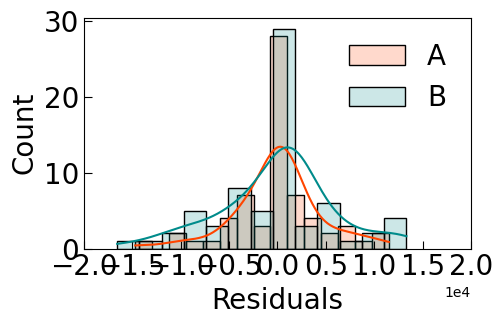

In [12]:
plt.figure(figsize = (5, 3))
get_fit_plot_residuals(x=droplets_volumes_a, y=organelles_volumes_a, color = 'orangered', alpha = 0.2, label = 'A'); 
get_fit_plot_residuals(x=droplets_volumes_b, y=organelles_volumes_b, color = 'darkcyan', alpha = 0.2, label = 'B'); 

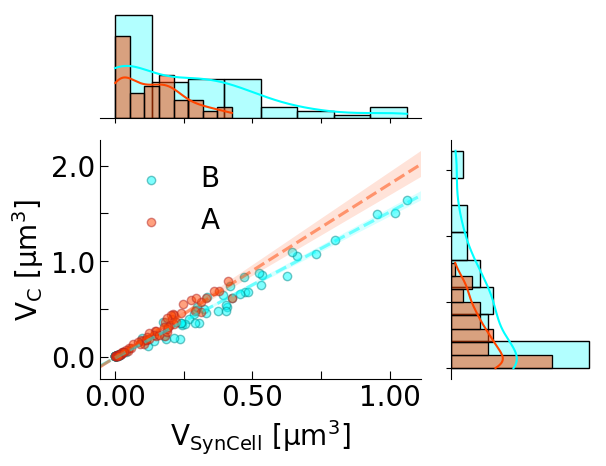

In [13]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 3)
ax1 = plt.subplot(gs[0, :-1])
ax2 = plt.subplot(gs[1:, :-1])
ax3 = plt.subplot(gs[1:, 2:])
                  
from matplotlib.ticker import ScalarFormatter
xfmt = ScalarFormatter(useMathText=True)

ax1.spines[['left', 'right', 'top']].set_visible(False)
ax1.set_yticks([], labels = [])
ax1.set_xticks([0, 2.5e5, 5e5, 7.5e5, 1e6], labels = [])
ax2.spines[['right', 'top']].set_visible(False)
ax3.spines[['right', 'top', 'bottom']].set_visible(False)
ax3.set_yticks([0, 5e4, 1e5, 1.5e5, 2e5], labels = [])
ax3.set_xticks([], labels = [])

sns.histplot(droplets_volumes_b, kde = True, color = 'cyan', alpha = 0.3, ax = ax1)
sns.histplot(droplets_volumes_a, kde = True, color = 'orangered', alpha = 0.5, ax = ax1)

sns.regplot(x = droplets_volumes_b, y = organelles_volumes_b, 
            truncate = False, color = 'cyan', robust = False, 
            scatter_kws={'alpha':0.5, 'ec' : 'darkcyan'}, line_kws={'alpha':0.5, 'ls' : 'dashed'}, 
            label = 'B', ax = ax2)
sns.regplot(x = droplets_volumes_a, y = organelles_volumes_a, 
            truncate = False, color = 'orangered', robust = False, 
            scatter_kws={'alpha':0.5, 'ec' : 'firebrick'}, line_kws={'alpha':0.5, 'ls' : 'dashed'}, 
            label = 'A', ax = ax2)
#plt.scatter(droplets_volumes_b, organelles_volumes_b, alpha = 0.8, color = 'cyan', s = 25, label = 'B')
#plt.plot(droplets_fit, droplets_fit*params_b[0] + params_b[1], color = 'darkcyan', ls = 'dashed', alpha = 0.5)

ax2.set_xlabel(r'$\rm V_{SynCell}$ [$\rm \mu$m$^3$]', fontsize=20)
ax2.set_ylabel(r'$\rm V_{C}$ [$\rm \mu$m$^3$]', fontsize=20)
ax2.set_xticks([0, 2.5e5, 5e5, 7.5e5, 1e6], labels = ['0.00', '', '0.50', '', '1.00'], fontsize = 20)
ax2.set_yticks([0, 5e4, 1e5, 1.5e5, 2e5], labels = [0.00, '', 1.00, '', 2.00], fontsize = 20)
ax2.legend(frameon = False, fontsize = 20, bbox_to_anchor = [0.45, 1.0]);
ax2.tick_params(direction = 'in', length = 6)
#ax2.ticklabel_format(style='sci', axis='x')
#ax2.ticklabel_format(style='sci', axis='y')

sns.histplot(y = organelles_volumes_b, kde = True, color = 'cyan', alpha = 0.3, ax = ax3)
sns.histplot(y = organelles_volumes_a, kde = True, color = 'orangered', alpha = 0.5, ax = ax3)
plt.show()

# Analysis of nanostar concentration within droplets (used in fluorimetry calibration, see: `Plate Reader/Droplets_Kinetics.ipynb`)

In [14]:
def concentration_report(organelle_volumes, droplets_volumes, mass_ns, arm_length_ns=28):
    # Distance among consecutive bp in rna in nm, 
    # REF: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4217419/#:~:text=Like%20DNA%2C%20RNA%20can%20form,B-form%20dsDNA%20
    d_bp_rna = 0.28
    
    # Arm length of rna nanostar in nm3
    arm_length_ns = d_bp_rna * arm_length_ns
    
    # Volume occupied by single RNA nanostar under spherical 3D shape approximation -> convert to dm3 = L (1e-8**3 factor = 1e-24)
    vol_ns = (4/3 * np.pi * arm_length_ns**3) * 1e-24
    
    # Mass concentration nanostar (Da/L)
    mass_conc_ns = mass_ns/vol_ns
    
    # Number concentration nanostar (num/L)
    number_conc_ns = 1/vol_ns

    # number of nanostars in condensate/organelle: concentration in number/L * volume in L = total number of nanostars
    num_ns_organelles = number_conc_ns * (organelle_volumes * 1e-15)  # converting condensate volume from um3 to dm3 (L) - 1e-5**3 = 1e-15
    
    # mass of nanostars in condensate/organelle: mass concentration (mass/L) * volume in L = total RNA mass in Dalton
    mass_ns_organelles = mass_ns * num_ns_organelles
    # Getting RNA mass in grams
    dalton_to_grams = (1.66054*1e-27) * 1e3 # to kg -> to g
    mass_ns_organelles = mass_ns_organelles * dalton_to_grams
    
    print('Average RNA nanostar mass concentration within entire droplets (g/L): ', np.mean(mass_ns_organelles/(droplets_volumes*1e-15)), '±', np.std(mass_ns_organelles/(droplets_volumes*1e-15)), ' g/L (or mg/mL equivalently)')
    
    # Getting concentration in molar units inside the droplets
    
    molecules_per_mol = N_A
    ns_molar_units = (num_ns_organelles/molecules_per_mol)/(droplets_volumes*1e-15)
    print('Average RNA nanostar concentration within entire droplets (uM): ', 1e6*np.mean(ns_molar_units), '±', 1e6*np.std(ns_molar_units), ' uM')


In [15]:
# A
concentration_report(
    organelle_volumes=organelles_volumes_a,
    droplets_volumes=droplets_volumes_a, 
    mass_ns=77.68 * 1000,  # computed from sequence using: https://www.aatbio.com/tools/calculate-RNA-molecular-weight-mw, option: 5' triphosphate
    arm_length_ns=28
)

Average RNA nanostar mass concentration within entire droplets (g/L):  10.229294277573926 ± 2.06769070963184  g/L (or mg/mL equivalently)
Average RNA nanostar concentration within entire droplets (uM):  131.68497079245827 ± 26.618042586050585  uM


In [16]:
# B
concentration_report(
    organelle_volumes=organelles_volumes_b,
    droplets_volumes=droplets_volumes_b, 
    mass_ns=83.24 * 1000,  # computed from sequence using: https://www.aatbio.com/tools/calculate-RNA-molecular-weight-mw, option: 5' triphosphate
    arm_length_ns=28
)

Average RNA nanostar mass concentration within entire droplets (g/L):  9.481357780520096 ± 1.8037768506667389  g/L (or mg/mL equivalently)
Average RNA nanostar concentration within entire droplets (uM):  113.90380170910235 ± 21.66957997808444  uM
